# MNIST Digits Classification

In [1]:
from bayes_conf_mat import Study, load_config

In [2]:
%ls ./mnist_digits

config.yaml  mlp_1.csv  mlp_3.csv  svm_0.csv  svm_2.csv  svm_4.csv
mlp_0.csv    mlp_2.csv  mlp_4.csv  svm_1.csv  svm_3.csv


In [3]:
study = Study.from_config(config="./mnist_digits/config.yaml")

## Sampling synthetic confusion matrices

In [8]:
for experiment, metrics_dict in study.sample_metrics(sampling_method="posterior"):
    for metric, result in metrics_dict.items():
        print(metric, result[0][0])

        break

    break

f1 SplitExperimentResult(experiment=Experiment(fold_0), metric=Metric(f1), values=array([0.90102465, 0.91138662, 0.91987725, ..., 0.9012367 , 0.90545676,
       0.90842337]), class_index=0)


## Pairwise Comparison

In [8]:
print(
    study.report_pairwise_comparison(
        metric_name="mcc",
        experiment_group_name_a="svm",
        experiment_group_name_b="mlp",
        min_sig_diff=0.01,
        precision=4,
    )
)

Experiment <svm>'s <mcc> being lesser than <mlp> could be considered 'dubious' (Median Δ=-0.0044, 95.00% HDI=[-0.0195, 0.0104], p_direction=71.96%).
There is a 26.35% probability that this difference is bidirectionally significant (ROPE=[-0.0100, 0.0100], p_ROPE=73.65%).
Bidirectional significance could be considered 'undecided'.
There is a 23.43% probability that this difference is significantly negative (p_pos=2.92%, p_neg=23.43%).


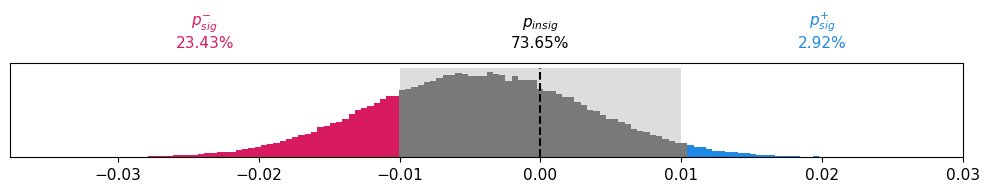

In [9]:
study.report_pairwise_comparison_plot(
    metric_name="mcc",
    experiment_group_name_a="svm",
    experiment_group_name_b="mlp",
    min_sig_diff=0.01,
    precision=4,
    figsize=(10, 2),
);